In [127]:
from astropy.io import fits
import scipy as sp
import numpy as np
from scipy import *
from decimal import Decimal
import numpy as np #imports numpy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D     
import seaborn as sns # provides a high-level interface to draw statitistical graphics
from pylab import *
%config InlineBackend.figure_format = 'retina' #makes images clearer
%matplotlib inline 
#^put plots in line?
from scipy.constants import parsec as pc


# Wavelength files

In [106]:
var = fits.open("../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits")
wave = var[0].data
fits.info("../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits")
fits.header()

Filename: ../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1569128,)   float64   


TypeError: 'module' object is not callable

# PHOENIX FILES

In [114]:
#fits_table_filename = fits.util.get_testdata_filepath('btable.fits')

hdu02300_35 = fits.open("../Desktop/CJ_Astro/lte02300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02300_35 = hdu02300_35[0].data #in terms of joules
hdu02300_35.info()
hdu02300_35[0].info()

hdu04000_40 = fits.open("../Desktop/CJ_Astro/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux04000_40 = hdu04000_40[0].data
# Stellar radius for hdu04000_40: 87491000000.0

hdu04100_40 = fits.open("../Desktop/CJ_Astro/lte04100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux04100_40 = hdu04100_40[0].data

hdu04500_40 = fits.open("../Desktop/CJ_Astro/lte04500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux04500_40 = hdu04500_40[0].data

hdu05000_35 = fits.open("../Desktop/CJ_Astro/lte05000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux05000_35 = hdu05000_35[0].data

hdu05000_40 = fits.open("../Desktop/CJ_Astro/lte05000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux05000_40 = hdu05000_40[0].data

hdu06000_35 = fits.open("../Desktop/CJ_Astro/lte06000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux06000_35 = hdu06000_35[0].data

hdu06000_40 = fits.open("../Desktop/CJ_Astro/lte06000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux06000_40 = hdu06000_40[0].data

hdu07000_40 = fits.open("../Desktop/CJ_Astro/lte07000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux07000_40 = hdu07000_40[0].data

hdu08000_40 = fits.open("../Desktop/CJ_Astro/lte08000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux08000_40 = hdu08000_40[0].data

hdu08600_40 = fits.open("../Desktop/CJ_Astro/lte08600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux08600_40 = hdu08600_40[0].data

hdu09000_40 = fits.open("../Desktop/CJ_Astro/lte09000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux09000_40 = hdu09000_40[0].data

hdu12000_40 = fits.open("../Desktop/CJ_Astro/lte12000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")
flux12000_40 = hdu12000_40[0].data

# Stellar radius for hdu12000_40: 262450000000.0


# hdu1.info()
#data = hdu02300_35[1].data  # assume the first extension is a table



# show the first two rows
# first_two_rows1 = data[:2]
#print(first_two_rows1)
# show the values in field "mag"

# columns can be referenced by index too
#elements1 = data.field(1)
#temp1 = data.field(0)
#flux1 = data.field(2)


hdu02300_35.close()
hdu04000_40.close()
hdu05000_35.close()
hdu05000_40.close()
hdu06000_35.close()
hdu09000_40.close()


Filename: ../Desktop/CJ_Astro/lte02300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1569128,)   float32   
  1  ABUNDANCES    1 BinTableHDU     15   83R x 3C   [I, 2A, E]   


AttributeError: 'PrimaryHDU' object has no attribute 'info'

In [ ]:
'''
Units: (erg/s/[stellar surface area]/A)/pc
So, take the units of the files erg/s/cm^2/cm => divide by 1e8, multiply by number of sq. cm on the surface of the star 
=meaning, multiply by the surface area of the star in cm [given in the file header]
And finally, multiply by the inverse square. (4*pi*(distance(cm)^2))
'''   
  

In [131]:
# Important values
dM67 = 900 # Distance to M67 in parsecs
# pi
PHXREFF =  87491000000.0 # Stellar radius for hdu04000_40
StelArea = 4*pi*PHXREFF**2 # surface area in square centimeters
StelFluxEarth = StelArea/(4*pi*dM67**2) # conversion for stellar flux as seen from Earth (multiply by flux######)

print('%.2E erg/s/A/pc' % Decimal(StelFluxEarth))

9.45E+15 erg/s/$\AA$/pc


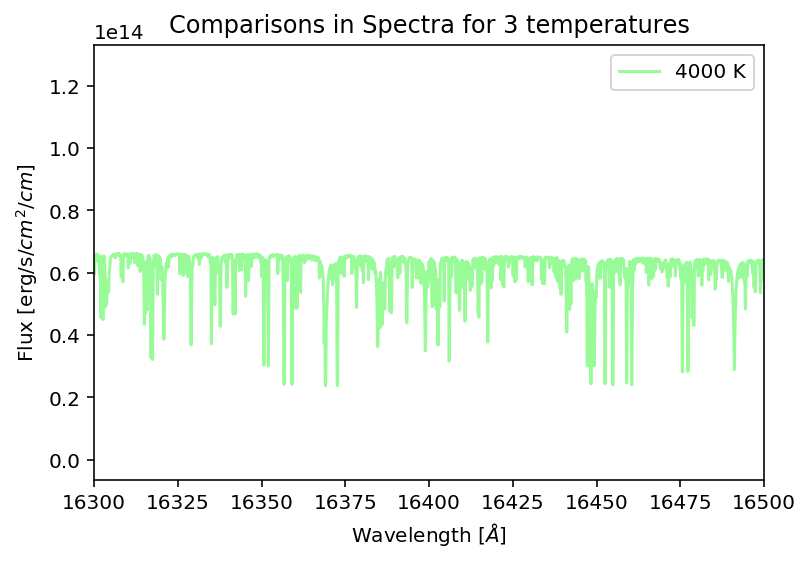

In [133]:
#plt.plot(wave, flux02300_35/1e8, color = 'steelblue', label = "2300 K")
#s= plt.plot(wave, flux09000_40/1e8, color = 'yellow', label = "9000 K")
#plt.plot(wave, flux08600_40/1e8, color = 'olive', label = "8600 K")
#plt.plot(wave, flux08000_40/1e8, color = 'magenta', label = "8000 K")
#plt.plot(wave, flux07000_40/1e8, color = 'midnightblue', label = "7000 K")
#plt.plot(wave, flux06000_40/1e8, color = 'orange', label = "6000 K")
#plt.plot(wave, flux05000_35/1e8, color = 'blue', label = "5000 K")
#plt.plot(wave, flux04500_40/1e8, color = 'blue', label = "4500 K")
#plt.plot(wave, flux04100_40/1e8, color = 'firebrick', label = "4100 K")
plt.plot(wave, flux04000_40, color = 'palegreen', label = "4000 K")


#plt.plot(wave, flux12000_40/10e7, color = 'orange', label = "12000 K")
#plt.plot(temp2, flux2, color = 'red')
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [erg/s/$cm^2$/$cm$]")
xlim(16300,16500)
#ylim(200000,800000)
plt.title("Comparisons in Spectra for 3 temperatures")
plt.legend()
plt.show()

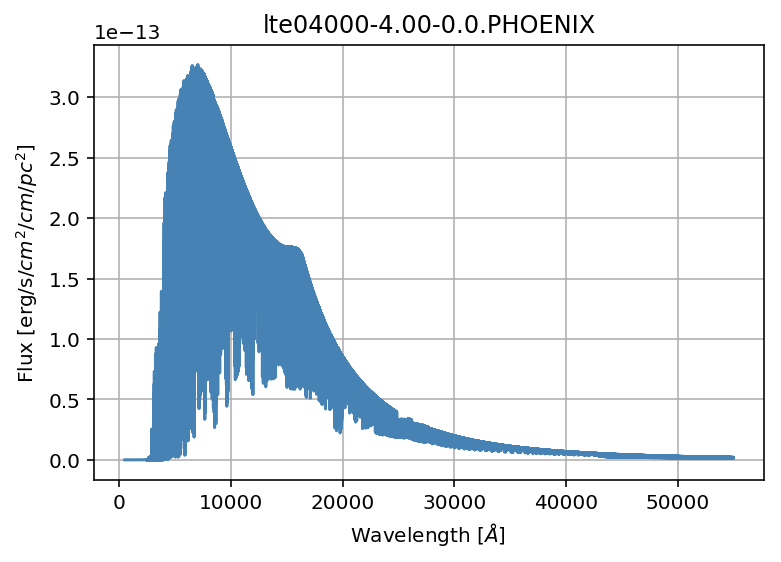

In [95]:
invSq = 4*pi*10*pc
plt.plot(wave, flux04000_40/1e8/invSq, color = 'steelblue')


#plt.plot(wave, flux09000_40/1e8/invSq, color = 'orange')
#plt.Line2D(wave, mu5/10e7, color = 'steelblue')
#plt.plot(temp2, flux2, color = 'red')
plt.xlabel("Wavelength [$\AA$] ")
plt.ylabel("Flux [erg/s/$cm^2$/$cm$/$pc^2$]")
plt.title("lte04000-4.00-0.0.PHOENIX")
#xlim(0,30000)
#ylim(0,1400000)
plt.grid()

plt.show()

In [ ]:
# temperature has a major change on the size/shape of the graph. As the temperature increases, the flux increases as well. 
# the increase in size is quite dramatic.
# There also appears to be a second peak to those graphs above 9000 K.

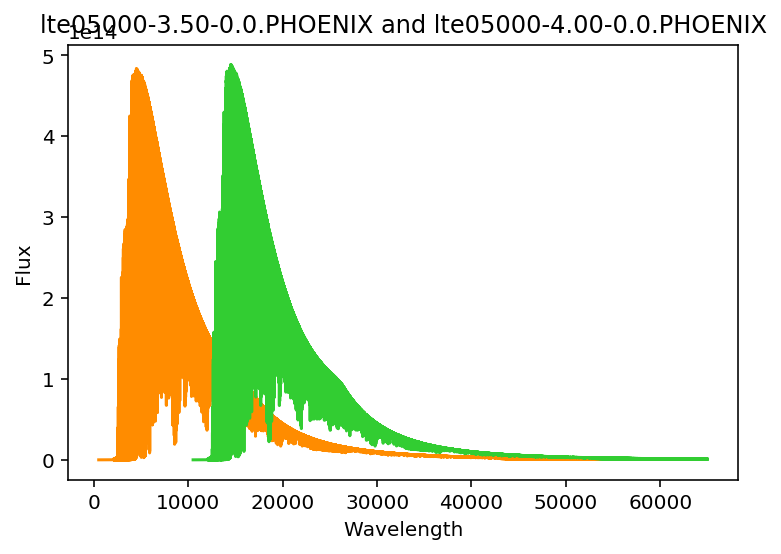

In [75]:
plt.plot(wave, flux05000_35, color = 'darkorange')
plt.plot(wave+10000, flux05000_40, color = 'limegreen')
#plt.plot(wave, mu4, color = 'blue')
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("lte05000-3.50-0.0.PHOENIX and lte05000-4.00-0.0.PHOENIX")
plt.show()
